In [20]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [21]:
df = pd.read_csv("data_files\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


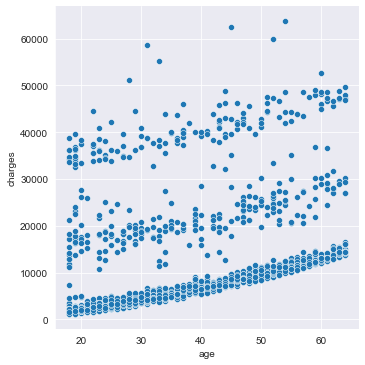

In [22]:
sns.relplot(x = "age", y="charges", data=df)

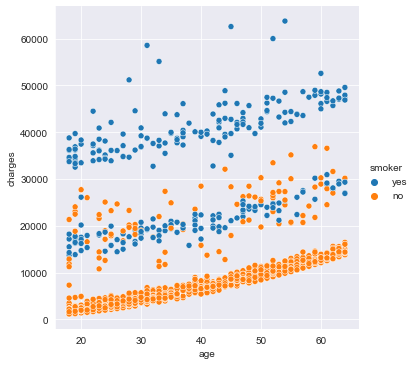

In [23]:
sns.relplot(x = "age", y="charges", hue="smoker", data=df)

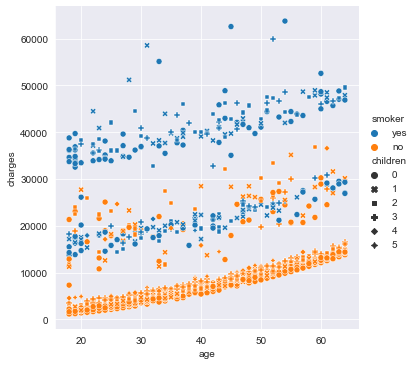

In [24]:
sns.relplot(x = "age", y="charges", hue="smoker", style= "children", data=df)

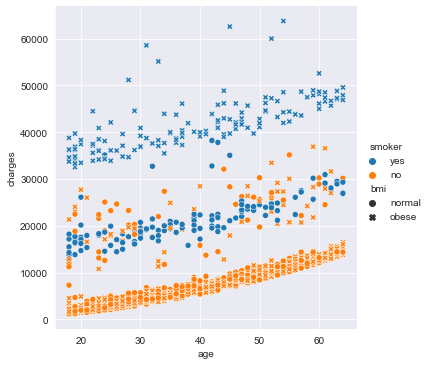

In [25]:
df["bmi"] = pd.cut(df['bmi'], bins=[0, 30, 100], include_lowest=True, labels=['normal','obese'])
sns.relplot(x = "age", y="charges", hue="smoker", style= "bmi", data=df)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,normal,0,yes,southwest,16884.92400
1,18,male,obese,1,no,southeast,1725.55230
2,28,male,obese,3,no,southeast,4449.46200
3,33,male,normal,0,no,northwest,21984.47061
4,32,male,normal,0,no,northwest,3866.85520


In [27]:
df = pd.concat([df, pd.get_dummies(df['bmi'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['smoker'], prefix="smoker")], axis=1)

In [37]:
df=pd.get_dummies(df)
df.head()

,age,children,charges,normal,obese,smoker_no,smoker_yes,smokeObese,sex_female,sex_male,bmi_normal,bmi_obese,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0
3,33,0,21984.47061,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0
4,32,0,3866.85520,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0


In [29]:
df["smokeObese"] = df["obese"]*df["smoker_yes"]
df.head()

,age,sex,bmi,children,smoker,region,charges,normal,obese,smoker_no,smoker_yes,smokeObese
0,19,female,normal,0,yes,southwest,16884.92400,1,0,0,1,0
1,18,male,obese,1,no,southeast,1725.55230,0,1,1,0,0
2,28,male,obese,3,no,southeast,4449.46200,0,1,1,0,0
3,33,male,normal,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,normal,0,no,northwest,3866.85520,1,0,1,0,0


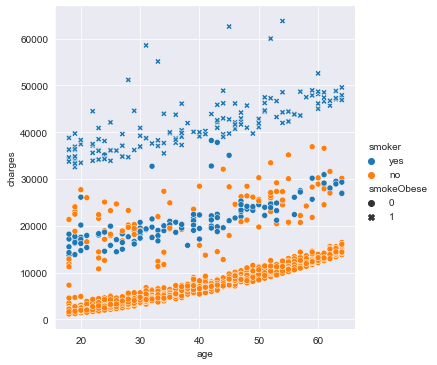

In [30]:
sns.relplot(x = "age", y="charges", hue="smoker", style= "smokeObese", data=df)

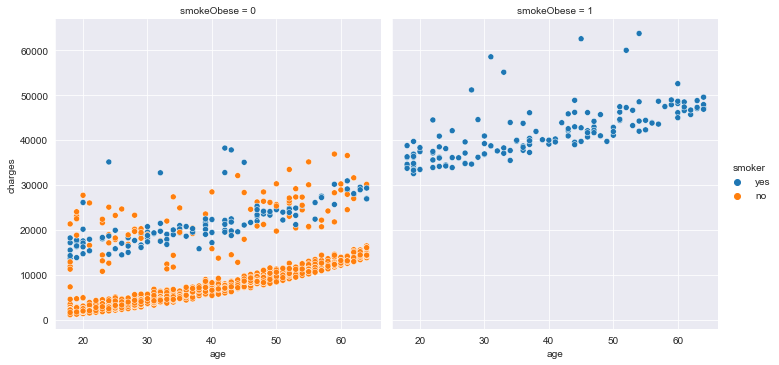

In [31]:
sns.relplot(x = "age", y="charges", hue="smoker", col= "smokeObese", data=df)

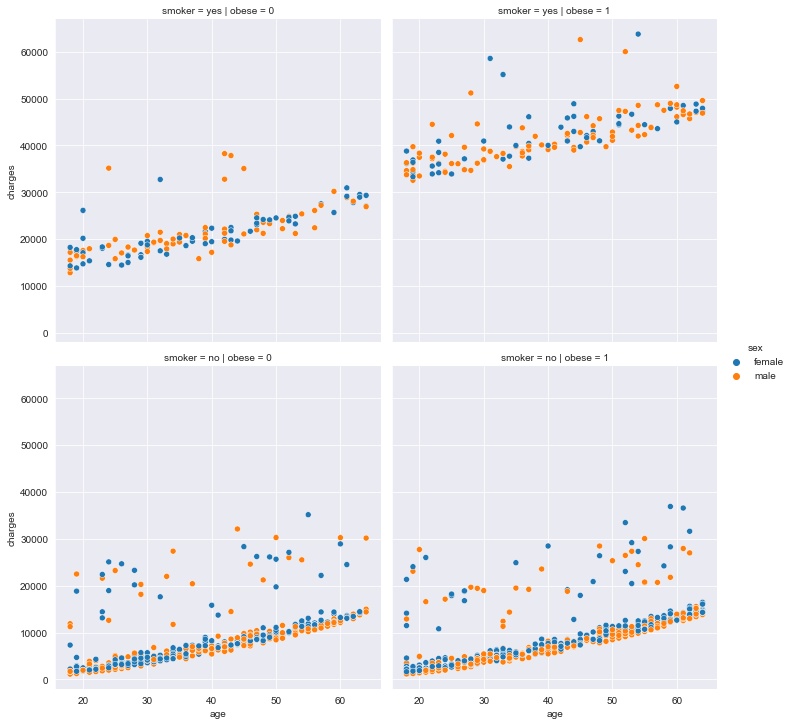

In [32]:
sns.relplot(x = "age", y="charges", hue="sex", row="smoker", col= "obese", data=df)

In [33]:
dfSmokeObese = df[df["smokeObese"] == 1]
len(dfSmokeObese)

144

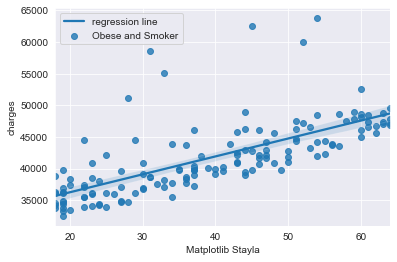

In [34]:
import matplotlib.pyplot as plt
sns.regplot(x = "age", y="charges", data=dfSmokeObese)
#alternatively
#sns.lmplot(x = "age", y="charges", data=dfSmokeObese)
plt.xlabel("Matplotlib Stayla")
plt.legend(["regression line", "Obese and Smoker"])

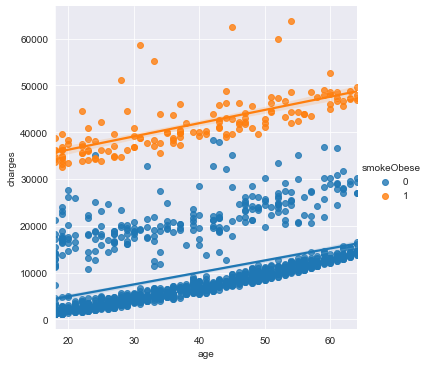

In [35]:
sns.lmplot(x = "age", y="charges", hue="smokeObese",  data=df)

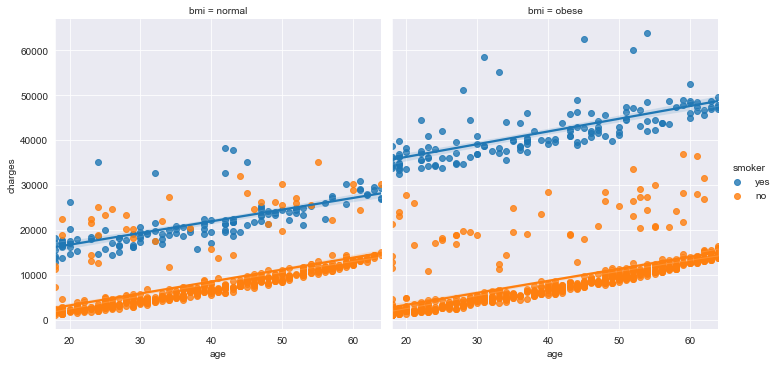

In [36]:
sns.lmplot(x = "age", y="charges", hue="smoker", col= "bmi", data=df)